We are given a set of dog and cat images. The task is to build a model to predict the category of an animal: dog or cat?

- <small>[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/alokyadavonline/)</small>
- <small>[![YouTube](https://img.shields.io/badge/YouTube-Subscribe-red?style=for-the-badge&logo=youtube)](https://youtube.com/@AlokYadavonline?si=rk9LORGLTujPjqOE)</small>

<small>Click the "LinkedIn" and "YouTube" badges above to connect with me on LinkedIn and subscribe to my YouTube channel for the latest updates.</small>

## Learning Objectives

1. Gain a foundational understanding of Convolutional Neural Networks (CNNs) and their role in image classification tasks.
2. Learn how to preprocess and augment image data for training CNNs using libraries like Keras and TensorFlow.
3. Explore the architecture of a CNN, including convolutional, activation, pooling, and fully connected layers, and their significance in feature extraction and classification.
4. Develop practical skills in building and training a CNN model to differentiate between cat and dog images using the Dogs vs Cats dataset.


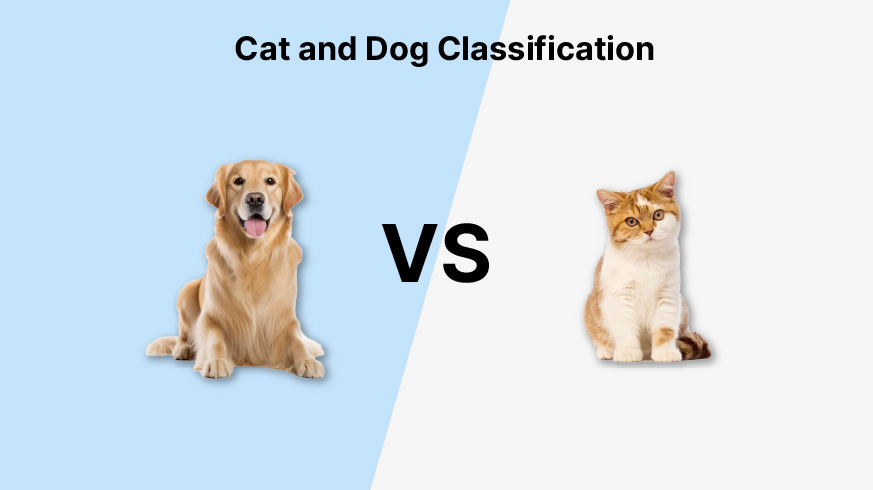

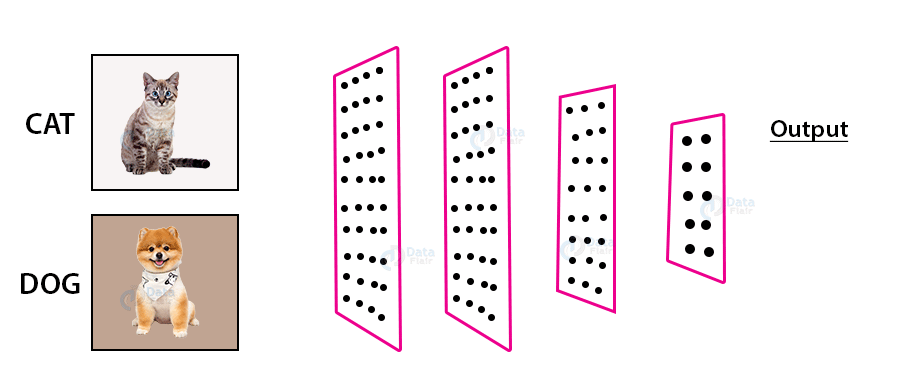

## Problem Statement

Develop a reliable image classification system that can accurately distinguish between images of cats and dogs, leveraging the power of Convolutional Neural Networks (CNNs).

## Steps to Solve

### Dataset Preparation

- **Gather Data:** Collect a sizable dataset of cat and dog images. You can find datasets on platforms like Kaggle or create your own. Ensure there's a good balance of images representing both classes.
- **Preprocessing:**
  - Resize images to a uniform size for consistency during training.
  - Normalize pixel values (usually between 0 and 1) to aid model convergence.

### CNN Model Design

- **Architecture:**
  - Begin with a simple CNN architecture with a few convolutional layers, pooling layers, and dense layers. Include an output layer with a 'sigmoid' activation for binary classification (cat or dog).
  - Experiment with the number of layers, filters, kernel sizes, and pooling types to optimize performance.
- **Compilation:**
  - Choose the 'binary_crossentropy' loss function since this is a binary classification task.
  - Select an optimizer like 'Adam'.
  - Use 'accuracy' as the evaluation metric.

### Model Training

- **Data Augmentation:** Implement techniques like random rotations, flipping, and zooming using an ImageDataGenerator (Keras) to prevent overfitting and make the model more robust.
- **Training Process:**
  - Divide the dataset into training and validation sets (e.g., 80% training, 20% validation).
  - Fit the model on the training set using a suitable batch size and number of epochs.
  - Monitor validation accuracy to manage overfitting.
- **Hyperparameter Tuning:** Experiment with different learning rates, optimizers, batch sizes, and model architectures to improve performance.

### Evaluation

- **Testing Dataset:** Utilize a separate testing dataset that the model hasn't seen during training.
- **Performance Metrics:** Calculate accuracy, precision, recall, and F1-score to obtain a comprehensive picture of the model's capabilities.
- **Confusion Matrix:** Visualize a confusion matrix to understand specific types of errors the model might be making.

### Deployment (Optional)

- **Web application:** Integrate the trained model into a web app for real-time image classification.
- **Mobile Application:** Adapt the model for deployment on mobile devices.

### Additional Considerations

- **Transfer Learning:** Leverage pre-trained models (e.g., VGG16, ResNet50) fine-tuned on animal image datasets for potentially improved performance.
- **Class Imbalance:** If your dataset has significantly more images of one class, address potential bias by data augmentation or sampling techniques.
- **Advanced Techniques:** Consider techniques like learning rate scheduling and regularization to further improve model performance.




**1. Setup and Imports**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
! git clone https://github.com/alokproc/Dog-or-Cat-Prediction-using-CNN-Model.git

Cloning into 'Dog-or-Cat-Prediction-using-CNN-Model'...
remote: Enumerating objects: 10024, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10024 (delta 1), reused 1 (delta 0), pack-reused 10018 (from 1)
Receiving objects: 100% (10024/10024), 216.40 MiB | 13.01 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (10008/10008), done.


**2. Data Preparation**

* **Assume you have a dataset with 'train' and 'test'  folders, each containing 'cats' and 'dogs' subfolders containing the images.**

> train_dir = 'path/to/your/train/folder'

>  test_dir = 'path/to/your/test/folder'


In [5]:
train_dir = 'Dog-or-Cat-Prediction-using-CNN-Model/dataset/training_set'
test_dir = 'Dog-or-Cat-Prediction-using-CNN-Model/dataset/test_set'



# ImageDataGenerator Setup

## Normalization:

- Rescale all pixel values in images to be between 0 and 1.

## Augmentations (train_datagen only):

- Randomly rotate images up to 40 degrees.
- Randomly shift images horizontally by up to 20% of their width.
- Randomly shift images vertically by up to 20% of their height.
- Randomly shear images (slight slant).
- Randomly zoom images.
- Randomly flip images horizontally.




### Explanation

- Normalization: Ensures pixel values are in a similar range, helping the model learn more effectively.
- Augmentation: Artificially creates variations of training images, making the model more robust and preventing overfitting.

In [6]:
img_width , img_height = 150 , 150
batch_size = 32

In [7]:
# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators

## Create Generators:

- Establish 'train_generator' and 'test_generator'

## Load Images from Directories:

- Pull images from specified training directory ('train_dir')
- Pull images from specified testing directory ('test_dir')

## Resize Images:

- Resize images to a consistent size ('img_width' by 'img_height')

## Batching:

- Images will be provided to the model in groups of a specified size ('batch_size')

## Labeling:

- Since this is a cat vs. dog problem, it is treated as binary classification.

### Explanation

- Normalization: Ensures pixel values are in a similar range, helping the model learn more effectively.
- Augmentation: Artificially creates variations of training images, making the model more robust and preventing overfitting.
- Data Generators: Provide a mechanism to efficiently load, process, and feed batches of images to the model during training and testing.


In [9]:
train_datagen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


In [10]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


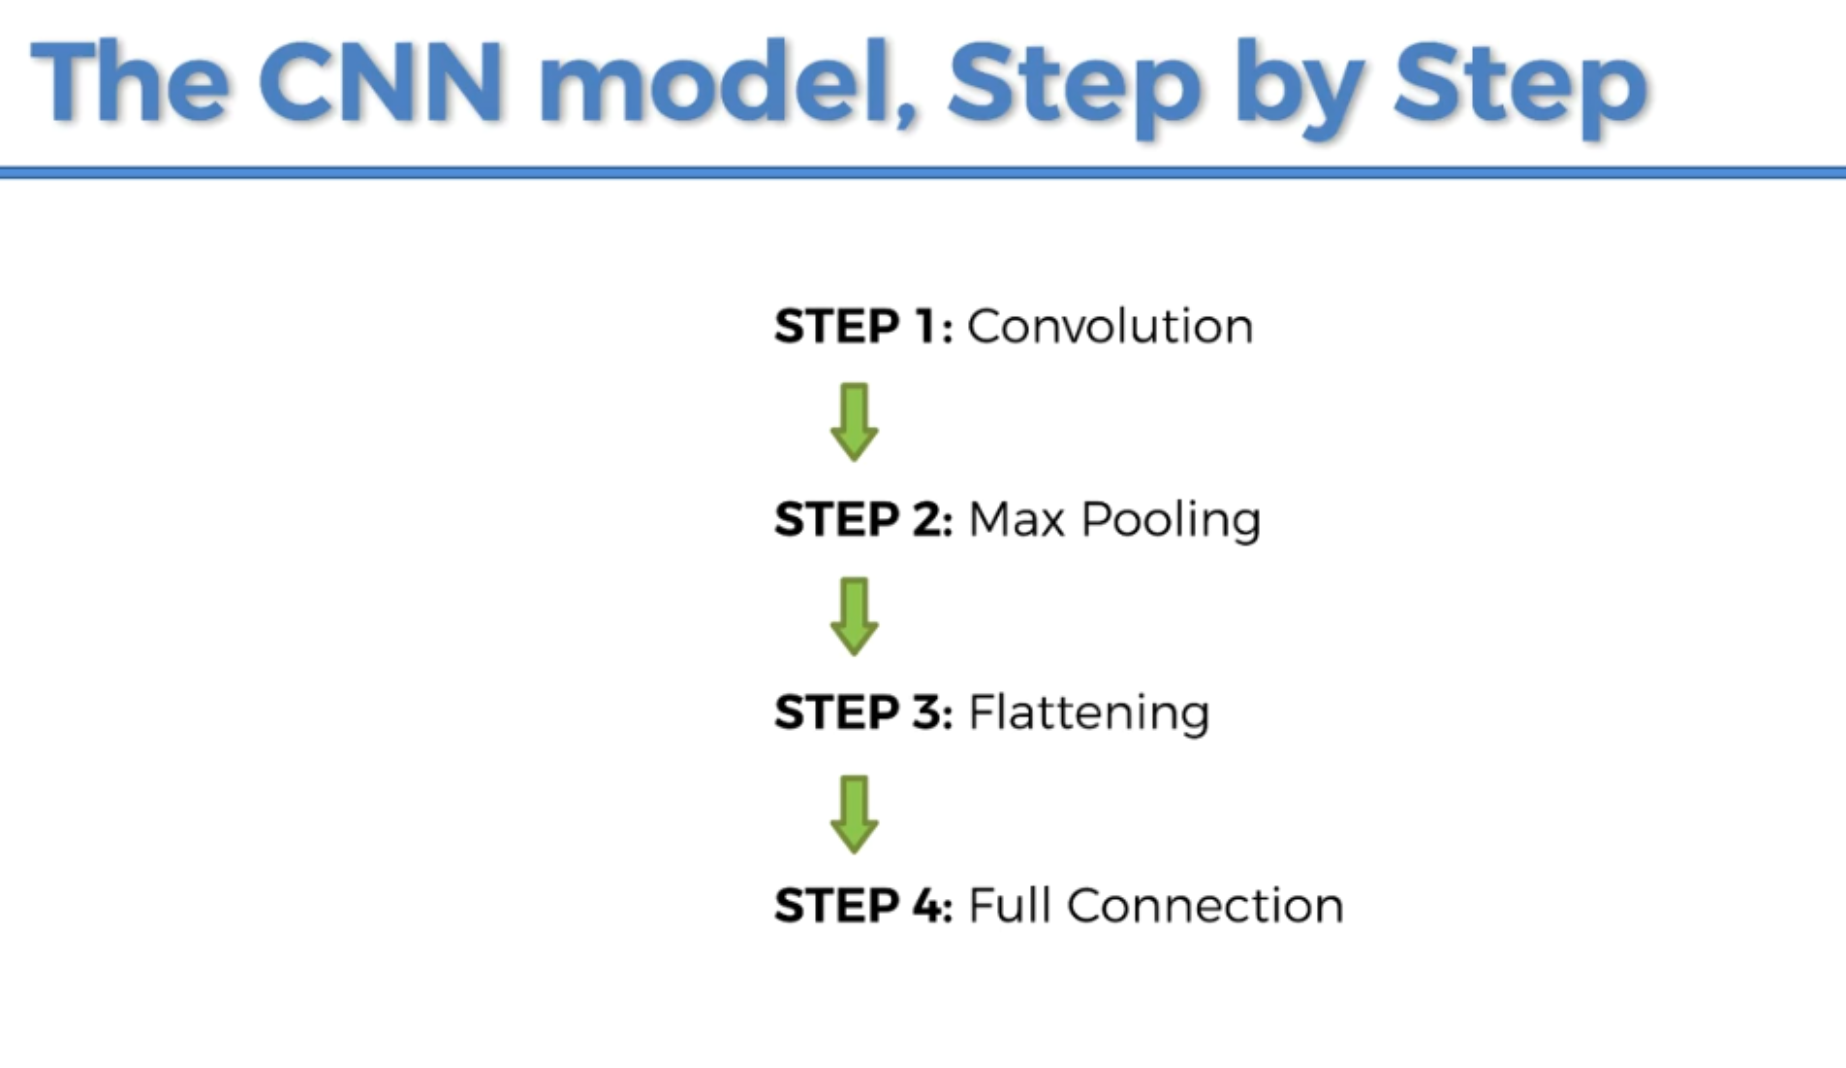

**3. CNN Model Architecture**

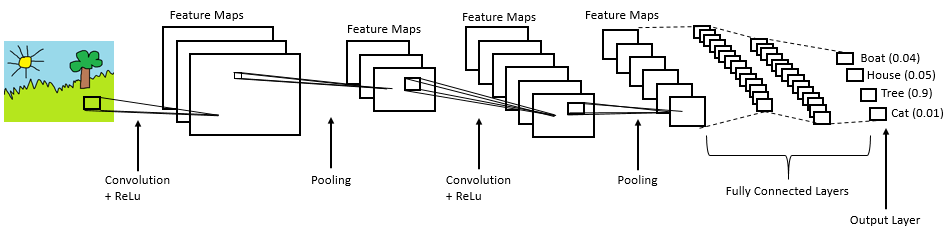

**1. Convolutional Layer:**

* Apply 64 filters (each with a 3x3 kernel size) to the input.
* Use ReLU activation function on the output.

**2. Max Pooling Layer:**

* Reduce the dimensionality of the feature maps by taking the maximum value in each 2x2 region.

**3. Convolutional Layer:**

* Apply 128 filters (each with a 3x3 kernel size) to the output of the previous layer.
* Use ReLU activation function on the output.

**4. Max Pooling Layer:**

* Reduce the dimensionality of the feature maps by taking the maximum value in each 2x2 region.

**5. Flatten Layer:**

* Convert the multi-dimensional feature maps into a single one-dimensional vector.

**6. Dense Layer:**

* Create a fully connected layer with 128 neurons.
* Apply the ReLU activation function on the output.

**7. Dropout Layer:**

* Randomly set 50% of the neurons in the previous layer to 0 (during training) to prevent overfitting.

**8. Output Layer:**

* Create a fully connected layer with a single neuron for binary classification (cat or dog).
* Employ the sigmoid activation function to generate a probability between 0 and 1.

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**4. Compilation**

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**5. Training**

In [14]:
epochs = 30

# Assuming you have an ImageDataGenerator called 'datagen'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Now use train_datagen and test_datagen to create your generators:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.5537 - loss: 0.6886 - val_accuracy: 0.6680 - val_loss: 0.6263
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 81ms/step - accuracy: 0.6701 - loss: 0.6028 - val_accuracy: 0.7085 - val_loss: 0.5633
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.7325 - loss: 0.5301 - val_accuracy: 0.7380 - val_loss: 0.5393
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7694 - loss: 0.4822 - val_accuracy: 0.7635 - val_loss: 0.5038
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.8132 - loss: 0.4168 - val_accuracy: 0.7770 - val_loss: 0.4673
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8427 - loss: 0.3534 - val_accuracy: 0.7920 - val_loss: 0.4975
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8835 - loss: 0.2775 - val_accuracy: 0.7940 - val_loss: 0.4935
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9106 - loss: 0.2157 - val_accurac

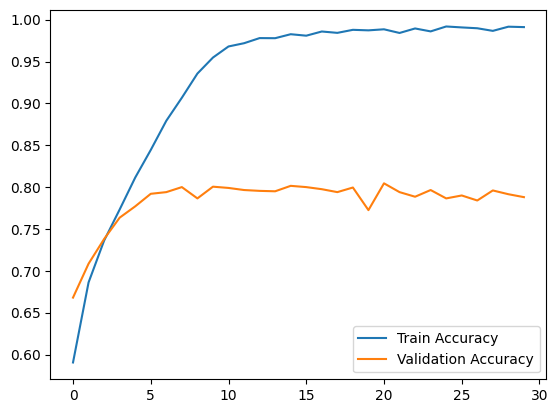

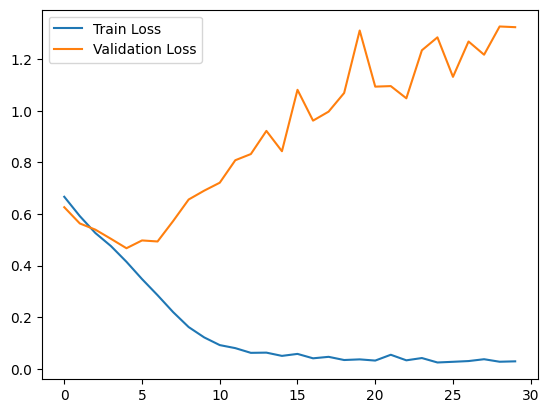

In [15]:
# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Similar plot for loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

**6. Evaluation (Optional)**

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7953 - loss: 1.2025
Test accuracy: 0.7879999876022339


In [18]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/Dog-or-Cat-Prediction-using-CNN-Model/dataset/single_prediction/cat_or_dog_2.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.  # Normalize pixel values


In [19]:
prediction = model.predict(img_array)
result = prediction[0][0]  # Access the probability

if result > 0.5:
    print("The image is likely a dog.")
else:
    print("The image is likely a cat.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
The image is likely a cat.


In [20]:

img_path = '/content/Dog-or-Cat-Prediction-using-CNN-Model/dataset/single_prediction/cat_or_dog_1.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.  # Normalize pixel values

prediction = model.predict(img_array)
result = prediction[0][0]  # Access the probability

if result > 0.5:
    print("The image is likely a dog.")
else:
    print("The image is likely a cat.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The image is likely a dog.


**Key Points:**

* **ImageDataGenerator:** Preprocesses and augments images, preventing overfitting.
* **CNN Architecture:** Experiment with layers, filters, and pooling sizes.
* **Compilation:** 'binary_crossentropy' loss and 'sigmoid' activation are suited for binary classification.
* **Epochs:** Increase if required; monitor validation accuracy to avoid overfitting.

**Remember:**

* Replace placeholders with your actual dataset paths.
* For larger datasets or more complex models, consider using a GPU.



## Save the Model

In [21]:
## Save the Model
import pickle
import os

In [22]:
dest = os.path.join('catdogclassifier', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)

In [24]:
pickle.dump(model, open(os.path.join(dest,'catdogclassifier.pkl'), 'wb'), protocol=4)

## Test the saved model

In [25]:
# Test the saved model
import re
import os
import pickle
import numpy as np

In [27]:
saved_model = pickle.load(open(os.path.join('catdogclassifier', 'pkl_objects', 'catdogclassifier.pkl'), 'rb'))

### Test with cat

In [28]:

img_path = '/content/Dog-or-Cat-Prediction-using-CNN-Model/dataset/single_prediction/cat_or_dog_2.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.  # Normalize pixel values

prediction = saved_model.predict(img_array)
result = prediction[0][0]  # Access the probability

if result > 0.5:
    print("The image is likely a dog.")
else:
    print("The image is likely a cat.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
The image is likely a cat.


### Test with dog

In [29]:
img_path = '/content/Dog-or-Cat-Prediction-using-CNN-Model/dataset/single_prediction/cat_or_dog_1.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.  # Normalize pixel values

prediction = saved_model.predict(img_array)
result = prediction[0][0]  # Access the probability

if result > 0.5:
    print("The image is likely a dog.")
else:
    print("The image is likely a cat.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The image is likely a dog.


<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://towardsdatascience.com/different-colorspaces-as-inputs-to-cnns-406ae62d1bd6">https://towardsdatascience.com/different-colorspaces-as-inputs-to-cnns-406ae62d1bd6</a></li>
  <li><a href="https://github.com/SergV77/SkinPnev">https://github.com/SergV77/SkinPnev</a></li>
  <li><a href="https://github.com/Snubie/FYP_repo">https://github.com/Snubie/FYP_repo</a></li>
  <li><a href="https://github.com/BasavarajMS11/Food-Image-Captioning-In-YELP-Dataset">https://github.com/BasavarajMS11/Food-Image-Captioning-In-YELP-Dataset</a></li>
  <li><a href="https://github.com/AleksandrUdalovCoding/Neural-network-ophtalmology">https://github.com/AleksandrUdalovCoding/Neural-network-ophtalmology</a></li>
  <li><a href="https://github.com/aluthra37/trashstop-dev">https://github.com/aluthra37/trashstop-dev</a></li>
  <li><a href="https://www.atmosera.com/blog/convolutional-neural-networks/">https://www.atmosera.com/blog/convolutional-neural-networks/</a></li>
  <li><a href="https://snlpatel0012134.wixsite.com/thinking-machine/single-post/introduction-to-deep-neural-network">https://snlpatel0012134.wixsite.com/thinking-machine/single-post/introduction-to-deep-neural-network</a></li>
  </ol>
</div>